In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('NETFLIX_REVIEWS.csv')

data.head()

,Unnamed: 0,review_id,pseudo_author_id,author_name,review_text,review_rating,review_likes,author_app_version,review_timestamp
0,0,7e73f80e-a8fd-4ff3-b09b-502f0ad058ff,152618553977019693742,A Google user,Works great on my Evo! Glad android phones are...,5,1,1.2.0 build 819145-1.2.0-102,2011-05-12 18:50:37
1,1,dab55eca-c2a0-45a8-93e3-9860c1c548da,234382942865437071667,A Google user,Works great on HTC incredible. Can't wait to t...,5,1,1.2.0 build 819145-1.2.0-102,2011-05-12 18:50:52
2,2,a3b8fa06-8b8f-4f2f-a1fa-fd37c4cbf598,174473604608358796368,A Google user,Works great on nexus s,5,0,1.5.2 build 389,2011-05-12 18:55:14
3,3,837fdfa5-606d-4cec-9e9a-e4a83dad633e,286593453219054880269,A Google user,"Working perfect for me on EVO, running CM 7.0.3.1",5,0,1.2.1 build 843839-1.2.0-30,2011-05-12 19:31:46
4,4,a8aaecb2-6984-44f7-b958-3f89f64d75f9,167276875678680630145,A Google user,cm7 2.3.3 N1,5,0,1.5.2 build 389,2011-05-12 19:32:50


In [38]:
data.shape

(1531126, 9)

In [42]:
sns.set(style="white")

C:\Users\lovel\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\lovel\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\lovel\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


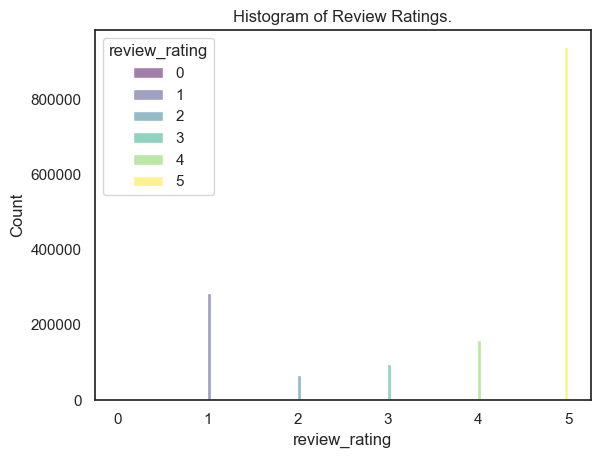

In [43]:
palette = sns.color_palette("viridis", as_cmap=True)
sns.histplot(data=data, x='review_rating', kde=True, hue='review_rating', palette=palette)
plt.title('Histogram of Review Ratings.')
plt.show()

C:\Users\lovel\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


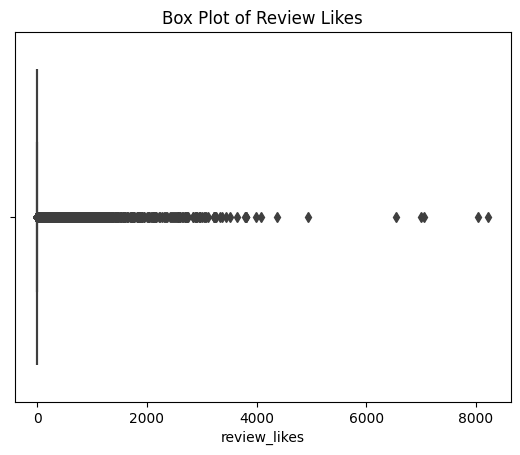

In [20]:
sns.boxplot(x='review_likes', data=data)
plt.title('Box Plot of Review Likes')
plt.show()

C:\Users\lovel\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


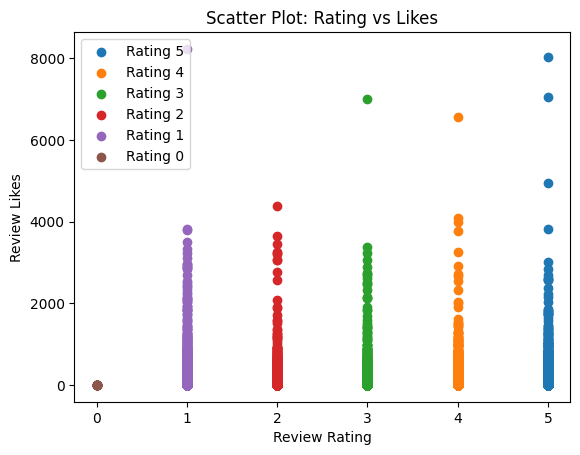

In [37]:
for rating_category in data['review_rating'].unique():
    subset = data[data['review_rating'] == rating_category]
    plt.scatter(subset['review_rating'], subset['review_likes'], label=f"Rating {rating_category}")

plt.xlabel('Review Rating')
plt.ylabel('Review Likes')
plt.title('Scatter Plot: Rating vs Likes')
plt.legend()
plt.show()

C:\Users\lovel\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\lovel\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\lovel\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\lovel\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is depr

<Figure size 1200x1600 with 0 Axes>

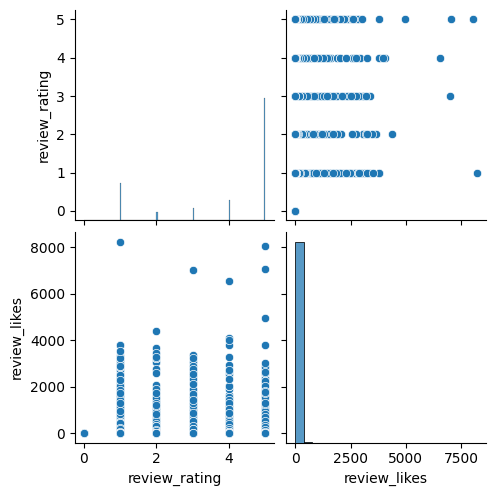

In [33]:
plt.figure(figsize=(12,16))
sns.pairplot(data[['review_rating', 'review_likes']])
plt.show()

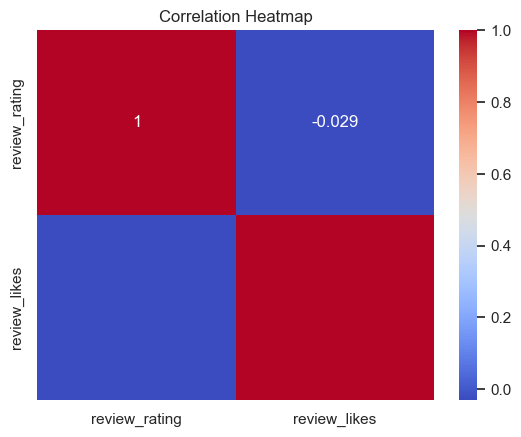

In [45]:
correlation_matrix = data[['review_rating', 'review_likes']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [51]:
import matplotlib.dates as mdates

C:\Users\lovel\AppData\Local\Temp\ipykernel_17732\2186133179.py:6: MatplotlibDeprecationWarning: The clean function was deprecated in Matplotlib 3.8 and will be removed two minor releases later. Use none, you no longer need to clean a Grouper instead.
  ax.scatter(data['review_rating'], data['review_likes'], data['review_timestamp'])


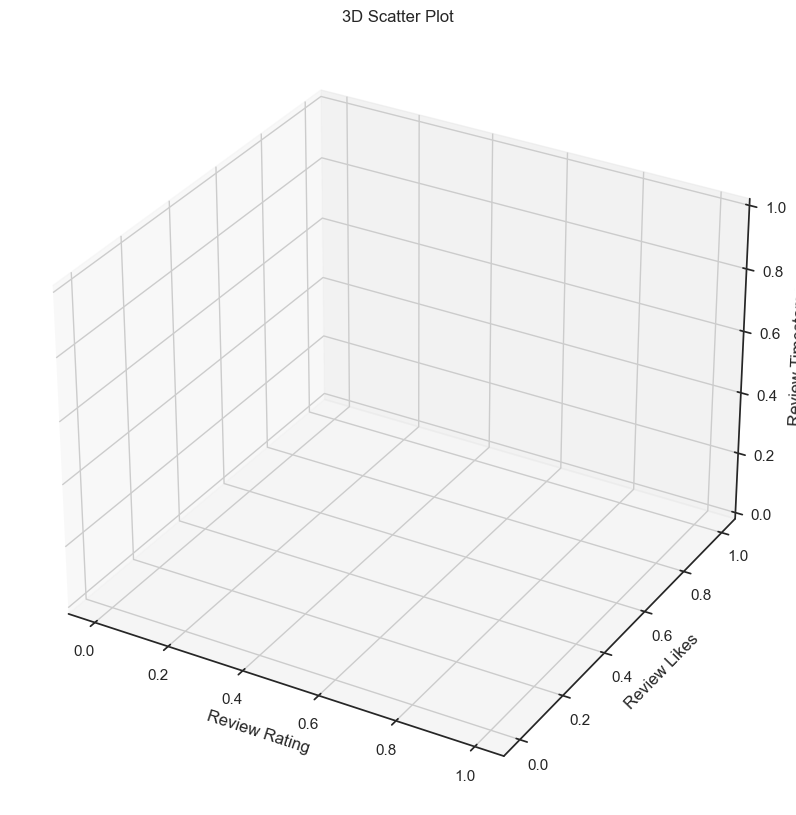

In [58]:
data['review_timestamp'] = pd.to_numeric(data['review_timestamp'], errors='coerce')


fig = plt.figure(figsize=(10,12))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data['review_rating'], data['review_likes'], data['review_timestamp'])
ax.set_xlabel('Review Rating')
ax.set_ylabel('Review Likes')
ax.set_zlabel('Review Timestamp')
plt.title('3D Scatter Plot')
plt.show()

In [67]:
st.title('Interactive Data Visualization with Streamlit')

# Univariate Visualization
st.subheader('Univariate Visualization')
sns.histplot(data['review_rating'], kde=True)
st.pyplot()
sns.boxplot(x='review_likes', data=data)
st.pyplot()

# Bivariate Visualization
st.subheader('Bivariate Visualization')
plt.scatter(data['review_rating'], data['review_likes'])
st.pyplot()
sns.pairplot(data[['review_rating', 'review_likes']])
st.pyplot()

# Multivariate Visualization
st.subheader('Multivariate Visualization')
data['review_timestamp'] = pd.to_numeric(data['review_timestamp'], errors='coerce')
# Create a heatmap of correlation matrix
heatmap_data = data[['review_rating', 'review_likes']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', cbar_kws={'label': 'Correlation'})
st.pyplot()

# 3D Scatter Plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data['review_rating'], data['review_likes'], data['review_timestamp'])
ax.set_xlabel('Review Rating')
ax.set_ylabel('Review Likes')
ax.set_zlabel('Review Timestamp')
plt.title('3D Scatter Plot')
st.pyplot()

C:\Users\lovel\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\lovel\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\lovel\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\lovel\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dty

DeltaGenerator()